# Assignment-3

**Due Date:** 14.12.2022 

---------------------------------------

**Instructor:** Erkut Erdem

**TA:** Sibel Kapan

---------------------------------------

**Student:** Sare Naz Ersoy

**Github Classroom:** https://classroom.github.com/a/Wv6S7qnL



## Part II: Classification of Flower Species using Neural Network
##  INTRODUCTION

For this assignment, we will implement a single layer and convolutional neural network architecture to classify the examples in the Flower Species Dataset mentioned below.

Both MLP and CNN can be used for Image classification however MLP takes vector as input and CNN takes tensor as input so CNN can understand spatial relation(relation between nearby pixels of image)between pixels of images better thus for complicated images CNN will perform better than MLP. CNN is designed to work for Images or Videos classification.
So MLP is good for simple image classification , CNN is good for complicated image classification.

#### Dataset
We will use Flower Species Dataset contains 1600 total images for each flower speciesand corresponding 7 labels. (See Figure 1) The flower species name for each class is
stated as below: 

– Class 1: bellflower

– Class 2: daisy

– Class 3: dandelion

– Class 4: lotus

– Class 5: rose

– Class 6: sunflower

– Class 7: tulip

• Dataset is separated as train and test. Train include 1400 images for per class and testinclude 200 images per class.

In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import time
import warnings

warnings.filterwarnings('ignore')
os.environ['KMP_DUPLICATE_LIB_OK']='True'

### Dataset Upload and Preprocessing for MLP

First of all let us import all the libraries required. Then we read the data and reshape the image dimensions

In [2]:
#Folder reader function
def readfolder(folder):
    folderdata = []
    for images in os.listdir(folder):
     
        # check if the image ends with png
        if (images.endswith(".jpg")):
            folderdata.append(os.path.join(folder,images))
            
    return folderdata

In [3]:
trainbellflower = readfolder("flowers/train/bellflower")
traindaisy = readfolder("flowers/train/daisy")
traindandelion = readfolder("flowers/train/dandelion")
trainlotus = readfolder("flowers/train/lotus")
trainrose = readfolder("flowers/train/rose")
trainsunflower = readfolder("flowers/train/sunflower")
traintulip = readfolder("flowers/train/tulip")

testbellflower = readfolder("flowers/test/bellflower")
testdaisy = readfolder("flowers/test/daisy")
testdandelion = readfolder("flowers/test/dandelion")
testlotus = readfolder("flowers/test/lotus")
testrose = readfolder("flowers/test/rose")
testsunflower = readfolder("flowers/test/sunflower")
testtulip = readfolder("flowers/test/tulip")

In [4]:
trainAllstr = []
testAllstr = []
trainAll = []
testAll = []
for i in testbellflower:
    x=cv2.resize(cv2.imread(i),(32,32))
    testAll.append(x)
    testAllstr.append([x,"bellflower"])
for i in testdaisy:
    x=cv2.resize(cv2.imread(i),(32,32))
    testAll.append(x)
    testAllstr.append([x,"daisy"])
for i in testdandelion:
    x=cv2.resize(cv2.imread(i),(32,32))
    testAll.append(x)
    testAllstr.append([x,"dandelion"])
for i in testlotus:
    x=cv2.resize(cv2.imread(i),(32,32))
    testAll.append(x)
    testAllstr.append([x,"lotus"])
for i in testrose:
    x=cv2.resize(cv2.imread(i),(32,32))
    testAll.append(x)
    testAllstr.append([x,"rose"])
for i in testsunflower:
    x=cv2.resize(cv2.imread(i),(32,32))
    testAll.append(x)
    testAllstr.append([x,"sunflower"])    
for i in testtulip:
    x=cv2.resize(cv2.imread(i),(32,32))
    testAll.append(x)
    testAllstr.append([x,"tulip"])      
    
    
for i in trainbellflower:
    x=cv2.resize(cv2.imread(i),(32,32))
    trainAll.append(x)
    trainAllstr.append([x,"bellflower"])
for i in traindaisy:
    x=cv2.resize(cv2.imread(i),(32,32))
    trainAll.append(x)
    trainAllstr.append([x,"daisy"])
for i in traindandelion:
    x=cv2.resize(cv2.imread(i),(32,32))
    trainAll.append(x)
    trainAllstr.append([x,"dandelion"])
for i in trainlotus:
    x=cv2.resize(cv2.imread(i),(32,32))
    trainAll.append(x)
    trainAllstr.append([x,"lotus"])
for i in trainrose:
    x=cv2.resize(cv2.imread(i),(32,32))
    trainAll.append(x)
    trainAllstr.append([x,"rose"])
for i in trainsunflower:
    if(cv2.imread(i) is not None):
        x=cv2.resize(cv2.imread(i),(32,32))
        trainAll.append(x)
        trainAllstr.append([x,"sunflower"])
for i in traintulip:
    x=cv2.resize(cv2.imread(i),(32,32))
    trainAll.append(x)
    trainAllstr.append([x,"tulip"])

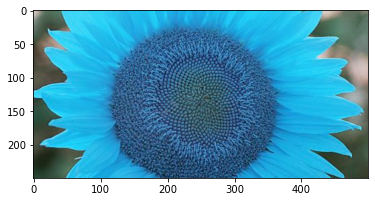

In [8]:
plt.imshow(cv2.imread(trainsunflower[2])) #example image

In [7]:
df = pd.DataFrame(trainAllstr, columns=["Matrices", "Kinds"])

In [6]:
df.head()

,Matrices,Kinds
0,"[[[87, 95, 98], [88, 95, 95], [93, 98, 99], [9...",bellflower
1,"[[[71, 108, 108], [79, 128, 125], [45, 101, 88...",bellflower
2,"[[[89, 137, 147], [123, 133, 141], [199, 131, ...",bellflower
3,"[[[78, 130, 136], [78, 129, 132], [74, 123, 12...",bellflower
4,"[[[30, 82, 85], [30, 80, 86], [21, 68, 72], [3...",bellflower


In [7]:
df['Kinds'].value_counts()

bellflower    1400
daisy         1400
dandelion     1400
lotus         1400
rose          1400
tulip         1400
sunflower     1399
Name: Kinds, dtype: int64

In [8]:
for i in range(0,len(trainAll)):
    trainAll[i] = trainAll[i].reshape(3072,)
for i in range(0,len(testAll)):
    testAll[i] = testAll[i].reshape(3072,)

In [9]:
def get_key(my_dict, val):
    for key, value in my_dict.items():
        if val == value:
            return key

In [10]:
labels = {0:"bellflower", 1:"daisy", 2:"dandelion", 3:"lotus", 4:"rose", 5:"sunflower", 6:"tulip"}
TrainLabels = []
TestLabels = []
for i in trainAllstr:
    TrainLabels.append(get_key(labels,i[1]))
for i in testAllstr:
    TestLabels.append(get_key(labels,i[1]))
    


### Multi Layer Neural Network


Now, we will create a Multi Layer Neural Network model

In [11]:
def sigmoid(x):
    return 1./(1.+ np.exp(-x))

def softmax(x):
    return np.exp(x)/np.exp(x).sum(axis=1,keepdims=True)

def loss(y_predict,y):
    return ((-np.log(y_predict))*y).sum(axis=1).mean()

In [12]:
class MLNN():
    
    def __init__(self,X,Y,X_test,Y_test,L=1,NL=128):
        self.X = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)
        self.Y = np.squeeze(np.eye(10)[Y.astype(np.int).reshape(-1)])
        self.X_test = np.concatenate((X_test,np.ones((X_test.shape[0],1))),axis=1)
        self.Y_test = np.squeeze(np.eye(10)[Y_test.astype(np.int).reshape(-1)])
        self.L = L
        self.NL = NL
        self.n_values = self.X.shape[0]
        layer_r = self.X.shape[1]
        layer_c = self.Y.shape[1]
        self.layer_sizes =np.array([layer_r] + [NL] * L + [layer_c]) 
        self.__init_weights()
        
    
    def __to_categorical(self,X):  
        shapeX = X.shape[0]
        categorical = np.zeros((shapeX,self.Y.shape[1]))
        cat_const = np.arange(shapeX),X.argmax(axis=1)
        categorical[cat_const] = 1
        return categorical
    
    def __init_weights(self):
        self.weights = []
        for i in range(self.layer_sizes.shape[0]-1):
            self.weights.append(np.random.uniform(-1,1,size=[self.layer_sizes[i],self.layer_sizes[i+1]]))
        self.weights = np.asarray(self.weights)
    
    def __init_layers(self,batch_size):
        self.__h = [np.empty((batch_size,layer)) for layer in self.layer_sizes]
    
    def __forwardProp(self,batch):
        h_l = batch
        self.__h[0] = h_l
        for i,weights in enumerate(self.weights):
            h_l = sigmoid(h_l.dot(weights))
            self.__h[i+1]=h_l
        self.__out = softmax(self.__h[-1])
    
    def __backProp(self,batch_y):
        h = self.__h
        delta = (self.__out - batch_y)*((h[-1])*(1-h[-1]))
        for i in range(1,len(self.weights)+1):
            self.weights[-i]-=self.lr*(h[-i-1].T.dot(delta))/self.batch_size
            delta = ((h[-i-1])* (1-h[-i-1]))*(delta.dot(self.weights[-i].T))
            
    def predict(self,X):
        shape = X.shape[0]
        X = np.concatenate((X,np.ones((shape,1))),axis=1)
        self.__init_layers(shape)
        self.__forwardProp(X)
        return self.__to_categorical(self.__out)
        
    def train(self,batch_size,epochs,lr):
        self.lr = lr
        self.batch_size=batch_size
        for epoch in range(0,epochs):
            self.__init_layers(self.batch_size)
            shuffled = np.random.permutation(self.n_values)
            batchX = np.array_split(self.X[shuffled],self.n_values/self.batch_size)
            batchY = np.array_split(self.Y[shuffled],self.n_values/self.batch_size)
            for batch_x,batch_y in zip(batchX,batchY):
                self.__forwardProp(batch_x)  
                self.__backProp(batch_y)
            self.__init_layers(self.X_test.shape[0])
            self.__forwardProp(self.X_test)


In [13]:
def accuracy(y_test , pred):
    counter = 0
    for i in range(0,len(y_test)):
        if y_test[i] == pred[i]:
            counter = counter + 1
    acc = counter / len(pred)
    return acc*100


In [14]:
from sklearn.metrics import accuracy_score


In [15]:
X_train = np.array(trainAll)
X_test = np.array(testAll)
y_train = np.array(TrainLabels)
y_test = np.array(TestLabels)

### Learning Rate
The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated.

Choosing the learning rate is challenging as a value too small may result in a long training process that could get stuck, whereas a value too large may result in learning a sub-optimal set of weights too fast or an unstable training process.

I tested the "learning rate" parameters (0.005,0.01,0.015 and 0.02) with keeping other variables the same.

We can't always say that bigger learning rate is better. You can see in the tables below how much the change of learning rate affects the accuracy.

### Batch Size
Batch size is a term used in machine learning and refers to the number of training examples utilized in one iteration.
The smaller the batch the less accurate the estimate of the gradient will be.The higher the batch size, the more memory space you'll need.

I tested the "batch size" parameters (16,32,64 and 128) with keeping other variables the same.

### Epochs
An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset
the machine learning algorithm has completed
one epoch = one forward pass and one backward pass of all the training examples

I tested one "epochs" parameter(50 for NN and 10 for CNN) because changing that too is a bit costly in time.

## Number of Layers
I tested the "number of layers" parameters as 0 hidden layer, 1 hidden layer and 2 hidden layers. 

### Layer Size
I tested the "number of layers" parameters as 128 and 256. 

### Activation Function
I used ReLU for activation function on CNN and sigmoid on NN. I also tried the others for finding the optimal one and observe the affects in one case.

##### One Layer NN

In [16]:
accs1 = []

In [17]:
for s in range(2):
    for a in range(4,8):
        for b in range(4):
            model = MLNN(X_train,y_train,X_test,y_test,L=1,NL=128+(128*s)) 
            model.train(batch_size=2**a,epochs=50,lr=0.005+(0.005*b))
            predict = model.predict(X_test)
            predictions = []
            y_tests = []
            for i in range(0,len(predict)):
                for j in range(0,10):
                    if predict[i][j] == 1:
                        predictions.append(j)
            for i in range(0,len(y_test)):
                y_tests.append(y_test[i])
            accuracy = accuracy_score(y_tests,predictions)
            accs1.append(accuracy)
            print("Batch Size:",2**a,"Learning Rate:" ,(0.005+(0.005*b)),"Layer Size:", (128+(128*s)), "Accuracy: ",accuracy)

Batch Size: 16 Learning Rate: 0.005 Layer Size: 128 Accuracy:  0.16285714285714287
Batch Size: 16 Learning Rate: 0.01 Layer Size: 128 Accuracy:  0.1407142857142857
Batch Size: 16 Learning Rate: 0.015 Layer Size: 128 Accuracy:  0.155
Batch Size: 16 Learning Rate: 0.02 Layer Size: 128 Accuracy:  0.1457142857142857
Batch Size: 32 Learning Rate: 0.005 Layer Size: 128 Accuracy:  0.235
Batch Size: 32 Learning Rate: 0.01 Layer Size: 128 Accuracy:  0.17214285714285715
Batch Size: 32 Learning Rate: 0.015 Layer Size: 128 Accuracy:  0.15428571428571428
Batch Size: 32 Learning Rate: 0.02 Layer Size: 128 Accuracy:  0.19714285714285715
Batch Size: 64 Learning Rate: 0.005 Layer Size: 128 Accuracy:  0.16714285714285715
Batch Size: 64 Learning Rate: 0.01 Layer Size: 128 Accuracy:  0.17214285714285715
Batch Size: 64 Learning Rate: 0.015 Layer Size: 128 Accuracy:  0.17214285714285715
Batch Size: 64 Learning Rate: 0.02 Layer Size: 128 Accuracy:  0.1442857142857143
Batch Size: 128 Learning Rate: 0.005 Laye

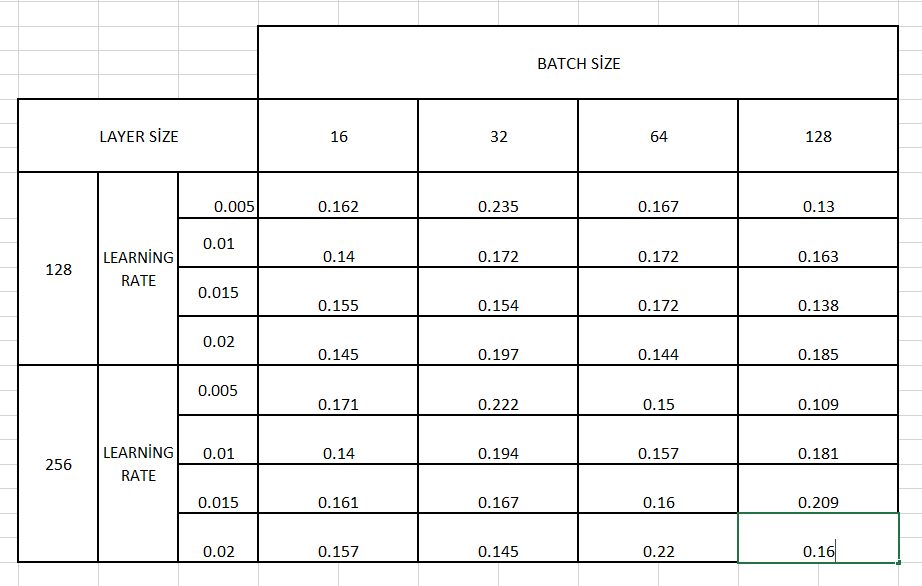

##### I choosed lr=0.005, batch size = 32 and layer size=256 and I used Sigmoid function. It gives 0.222 accuracy.

##### One Hidden Layer NN

In [18]:
accs2 = []

In [19]:
for s in range(2):
    for a in range(4,8):
        for b in range(4):
            model = MLNN(X_train,y_train,X_test,y_test,L=2,NL=128+(128*s)) 
            model.train(batch_size=2**a,epochs=50,lr=0.005+(0.005*b))
            predict = model.predict(X_test)
            predictions = []
            y_tests = []
            for i in range(0,len(predict)):
                for j in range(0,10):
                    if predict[i][j] == 1:
                        predictions.append(j)
            for i in range(0,len(y_test)):
                y_tests.append(y_test[i])
            accuracy = accuracy_score(y_tests,predictions)
            accs2.append(accuracy)
            print("Batch Size:",2**a,"Learning Rate:" ,(0.005+(0.005*b)),"Layer Size:", (128+(128*s)), "Accuracy: ",accuracy)

Batch Size: 16 Learning Rate: 0.005 Layer Size: 128 Accuracy:  0.15928571428571428
Batch Size: 16 Learning Rate: 0.01 Layer Size: 128 Accuracy:  0.23
Batch Size: 16 Learning Rate: 0.015 Layer Size: 128 Accuracy:  0.13785714285714284
Batch Size: 16 Learning Rate: 0.02 Layer Size: 128 Accuracy:  0.03642857142857143
Batch Size: 32 Learning Rate: 0.005 Layer Size: 128 Accuracy:  0.12
Batch Size: 32 Learning Rate: 0.01 Layer Size: 128 Accuracy:  0.15571428571428572
Batch Size: 32 Learning Rate: 0.015 Layer Size: 128 Accuracy:  0.17285714285714285
Batch Size: 32 Learning Rate: 0.02 Layer Size: 128 Accuracy:  0.14357142857142857
Batch Size: 64 Learning Rate: 0.005 Layer Size: 128 Accuracy:  0.14142857142857143
Batch Size: 64 Learning Rate: 0.01 Layer Size: 128 Accuracy:  0.1492857142857143
Batch Size: 64 Learning Rate: 0.015 Layer Size: 128 Accuracy:  0.12857142857142856
Batch Size: 64 Learning Rate: 0.02 Layer Size: 128 Accuracy:  0.2864285714285714
Batch Size: 128 Learning Rate: 0.005 Layer

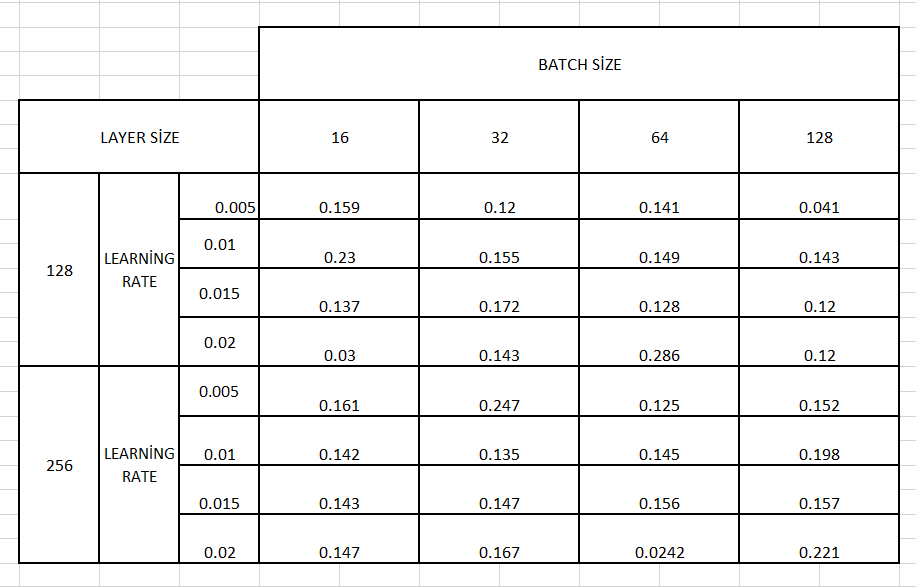

##### I choosed lr=0.02, batch size = 64 and layer size=128 and I used Sigmoid function. It gives 0.286 accuracy.

##### 2 Hidden Layer NN

In [20]:
accs3 = []

In [21]:
for s in range(2):
    for a in range(4,8):
        for b in range(4):
            model = MLNN(X_train,y_train,X_test,y_test,L=3,NL=128+(128*s)) 
            model.train(batch_size=2**a,epochs=50,lr=0.005+(0.005*b))
            predict = model.predict(X_test)
            predictions = []
            y_tests = []
            for i in range(0,len(predict)):
                for j in range(0,10):
                    if predict[i][j] == 1:
                        predictions.append(j)
            for i in range(0,len(y_test)):
                y_tests.append(y_test[i])
            accuracy = accuracy_score(y_tests,predictions)
            accs3.append(accuracy)
            print("Batch Size:",2**a,"Learning Rate:" ,(0.005+(0.005*b)),"Layer Size:", (128+(128*s)), "Accuracy: ",accuracy)

Batch Size: 16 Learning Rate: 0.005 Layer Size: 128 Accuracy:  0.1442857142857143
Batch Size: 16 Learning Rate: 0.01 Layer Size: 128 Accuracy:  0.13857142857142857
Batch Size: 16 Learning Rate: 0.015 Layer Size: 128 Accuracy:  0.145
Batch Size: 16 Learning Rate: 0.02 Layer Size: 128 Accuracy:  0.002857142857142857
Batch Size: 32 Learning Rate: 0.005 Layer Size: 128 Accuracy:  0.12785714285714286
Batch Size: 32 Learning Rate: 0.01 Layer Size: 128 Accuracy:  0.14
Batch Size: 32 Learning Rate: 0.015 Layer Size: 128 Accuracy:  0.3107142857142857
Batch Size: 32 Learning Rate: 0.02 Layer Size: 128 Accuracy:  0.13
Batch Size: 64 Learning Rate: 0.005 Layer Size: 128 Accuracy:  0.16714285714285715
Batch Size: 64 Learning Rate: 0.01 Layer Size: 128 Accuracy:  0.15642857142857142
Batch Size: 64 Learning Rate: 0.015 Layer Size: 128 Accuracy:  0.14857142857142858
Batch Size: 64 Learning Rate: 0.02 Layer Size: 128 Accuracy:  0.25857142857142856
Batch Size: 128 Learning Rate: 0.005 Layer Size: 128 Ac

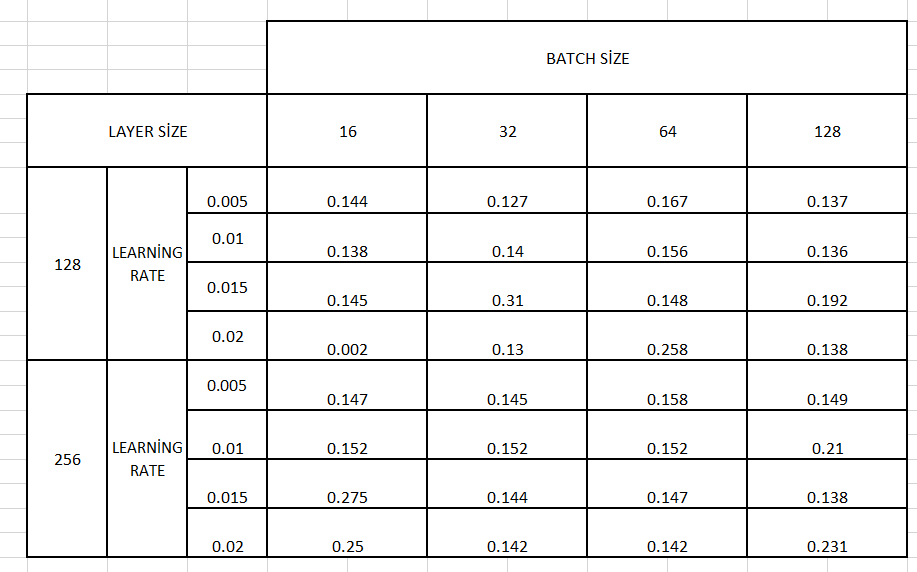

##### I choosed lr=0.015, batch size = 32 and layer size=128 and I used Sigmoid function. It gives 0.31 accuracy.

### Now, I will change the input size AS 64X64 and try them again.

In [22]:
trainAllstr = []
testAllstr = []
trainAll = []
testAll = []
for i in testbellflower:
    x=cv2.resize(cv2.imread(i),(64,64))
    testAll.append(x)
    testAllstr.append([x,"bellflower"])
for i in testdaisy:
    x=cv2.resize(cv2.imread(i),(64,64))
    testAll.append(x)
    testAllstr.append([x,"daisy"])
for i in testdandelion:
    x=cv2.resize(cv2.imread(i),(64,64))
    testAll.append(x)
    testAllstr.append([x,"dandelion"])
for i in testlotus:
    x=cv2.resize(cv2.imread(i),(64,64))
    testAll.append(x)
    testAllstr.append([x,"lotus"])
for i in testrose:
    x=cv2.resize(cv2.imread(i),(64,64))
    testAll.append(x)
    testAllstr.append([x,"rose"])
for i in testsunflower:
    x=cv2.resize(cv2.imread(i),(64,64))
    testAll.append(x)
    testAllstr.append([x,"sunflower"])    
for i in testtulip:
    x=cv2.resize(cv2.imread(i),(64,64))
    testAll.append(x)
    testAllstr.append([x,"tulip"])      
    
    
for i in trainbellflower:
    x=cv2.resize(cv2.imread(i),(64,64))
    trainAll.append(x)
    trainAllstr.append([x,"bellflower"])
for i in traindaisy:
    x=cv2.resize(cv2.imread(i),(64,64))
    trainAll.append(x)
    trainAllstr.append([x,"daisy"])
for i in traindandelion:
    x=cv2.resize(cv2.imread(i),(64,64))
    trainAll.append(x)
    trainAllstr.append([x,"dandelion"])
for i in trainlotus:
    x=cv2.resize(cv2.imread(i),(64,64))
    trainAll.append(x)
    trainAllstr.append([x,"lotus"])
for i in trainrose:
    x=cv2.resize(cv2.imread(i),(64,64))
    trainAll.append(x)
    trainAllstr.append([x,"rose"])
for i in trainsunflower:
    if(cv2.imread(i) is not None):
        x=cv2.resize(cv2.imread(i),(64,64))
        trainAll.append(x)
        trainAllstr.append([x,"sunflower"])
for i in traintulip:
    x=cv2.resize(cv2.imread(i),(64,64))
    trainAll.append(x)
    trainAllstr.append([x,"tulip"])

In [23]:
for i in range(0,len(trainAll)):
    trainAll[i] = trainAll[i].reshape(12288,)
for i in range(0,len(testAll)):
    testAll[i] = testAll[i].reshape(12288,)

In [24]:
accs4 = []

In [25]:
for s in range(2):
    for a in range(4,8):
        for b in range(4):
            model = MLNN(X_train,y_train,X_test,y_test,L=1,NL=128+(128*s)) 
            model.train(batch_size=2**a,epochs=50,lr=0.005+(0.005*b))
            predict = model.predict(X_test)
            predictions = []
            y_tests = []
            for i in range(0,len(predict)):
                for j in range(0,10):
                    if predict[i][j] == 1:
                        predictions.append(j)
            for i in range(0,len(y_test)):
                y_tests.append(y_test[i])
            accuracy = accuracy_score(y_tests,predictions)
            accs4.append(accuracy)
            print("Batch Size:",2**a,"Learning Rate:" ,(0.005+(0.005*b)),"Layer Size:", (128+(128*s)), "Accuracy: ",accuracy)

Batch Size: 16 Learning Rate: 0.005 Layer Size: 128 Accuracy:  0.125
Batch Size: 16 Learning Rate: 0.01 Layer Size: 128 Accuracy:  0.11857142857142858
Batch Size: 16 Learning Rate: 0.015 Layer Size: 128 Accuracy:  0.18142857142857144
Batch Size: 16 Learning Rate: 0.02 Layer Size: 128 Accuracy:  0.13357142857142856
Batch Size: 32 Learning Rate: 0.005 Layer Size: 128 Accuracy:  0.1357142857142857
Batch Size: 32 Learning Rate: 0.01 Layer Size: 128 Accuracy:  0.15357142857142858
Batch Size: 32 Learning Rate: 0.015 Layer Size: 128 Accuracy:  0.2
Batch Size: 32 Learning Rate: 0.02 Layer Size: 128 Accuracy:  0.024285714285714285
Batch Size: 64 Learning Rate: 0.005 Layer Size: 128 Accuracy:  0.08642857142857142
Batch Size: 64 Learning Rate: 0.01 Layer Size: 128 Accuracy:  0.05285714285714286
Batch Size: 64 Learning Rate: 0.015 Layer Size: 128 Accuracy:  0.16285714285714287
Batch Size: 64 Learning Rate: 0.02 Layer Size: 128 Accuracy:  0.12571428571428572
Batch Size: 128 Learning Rate: 0.005 Lay

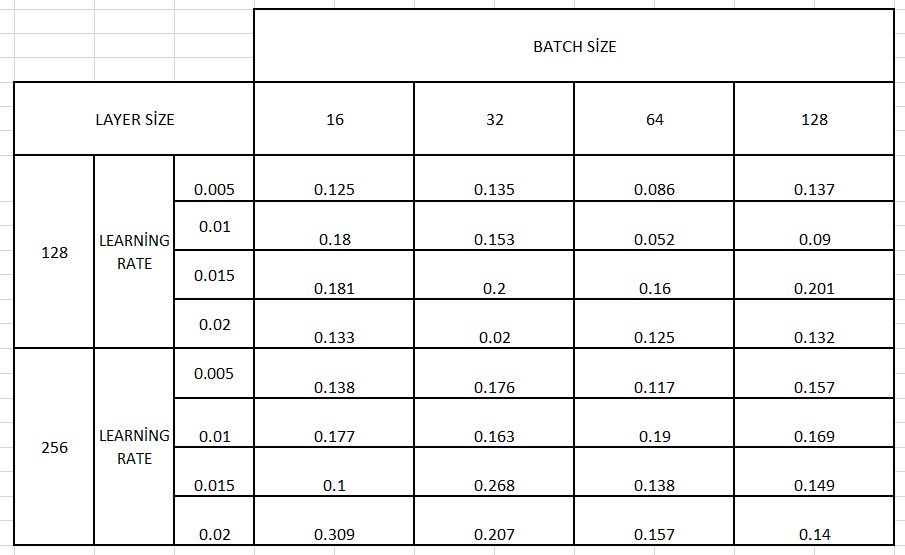

##### I choosed lr=0.02, batch size = 16 and layer size=56 and I used Sigmoid function. It gives 0.309 accuracy.

In [26]:
accs5=[]

In [27]:
for s in range(2):
    for a in range(4,8):
        for b in range(4):
            model = MLNN(X_train,y_train,X_test,y_test,L=2,NL=128+(128*s)) 
            model.train(batch_size=2**a,epochs=50,lr=0.005+(0.005*b))
            predict = model.predict(X_test)
            predictions = []
            y_tests = []
            for i in range(0,len(predict)):
                for j in range(0,10):
                    if predict[i][j] == 1:
                        predictions.append(j)
            for i in range(0,len(y_test)):
                y_tests.append(y_test[i])
            accuracy = accuracy_score(y_tests,predictions)
            accs5.append(accuracy)
            print("Batch Size:",2**a,"Learning Rate:" ,(0.005+(0.005*b)),"Layer Size:", (128+(128*s)), "Accuracy: ",accuracy)

Batch Size: 16 Learning Rate: 0.005 Layer Size: 128 Accuracy:  0.17285714285714285
Batch Size: 16 Learning Rate: 0.01 Layer Size: 128 Accuracy:  0.2592857142857143
Batch Size: 16 Learning Rate: 0.015 Layer Size: 128 Accuracy:  0.15785714285714286
Batch Size: 16 Learning Rate: 0.02 Layer Size: 128 Accuracy:  0.15357142857142858
Batch Size: 32 Learning Rate: 0.005 Layer Size: 128 Accuracy:  0.15357142857142858
Batch Size: 32 Learning Rate: 0.01 Layer Size: 128 Accuracy:  0.29642857142857143
Batch Size: 32 Learning Rate: 0.015 Layer Size: 128 Accuracy:  0.16214285714285714
Batch Size: 32 Learning Rate: 0.02 Layer Size: 128 Accuracy:  0.26142857142857145
Batch Size: 64 Learning Rate: 0.005 Layer Size: 128 Accuracy:  0.1492857142857143
Batch Size: 64 Learning Rate: 0.01 Layer Size: 128 Accuracy:  0.19857142857142857
Batch Size: 64 Learning Rate: 0.015 Layer Size: 128 Accuracy:  0.24071428571428571
Batch Size: 64 Learning Rate: 0.02 Layer Size: 128 Accuracy:  0.2507142857142857
Batch Size: 1

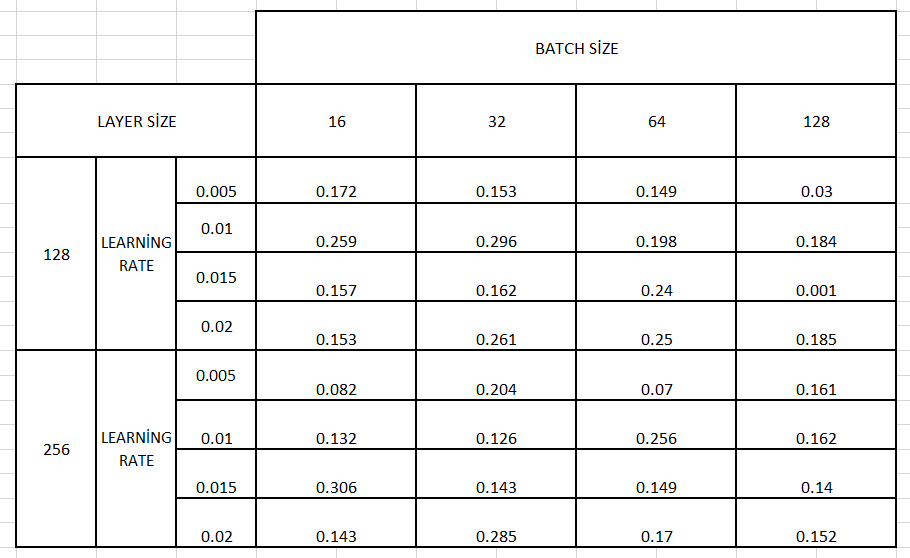

##### I choosed lr=0.015, batch size = 12 and layer size=256 and I used Sigmoid function. It gives 0.306 accuracy.

In [28]:
accs6=[]

In [29]:
for s in range(2):
    for a in range(4,8):
        for b in range(4):
            model = MLNN(X_train,y_train,X_test,y_test,L=3,NL=128+(128*s)) 
            model.train(batch_size=2**a,epochs=50,lr=0.005+(0.005*b))
            predict = model.predict(X_test)
            predictions = []
            y_tests = []
            for i in range(0,len(predict)):
                for j in range(0,10):
                    if predict[i][j] == 1:
                        predictions.append(j)
            for i in range(0,len(y_test)):
                y_tests.append(y_test[i])
            accuracy = accuracy_score(y_tests,predictions)
            accs6.append(accuracy)
            print("Batch Size:",2**a,"Learning Rate:" ,(0.005+(0.005*b)),"Layer Size:", (128+(128*s)), "Accuracy: ",accuracy)

Batch Size: 16 Learning Rate: 0.005 Layer Size: 128 Accuracy:  0.17285714285714285
Batch Size: 16 Learning Rate: 0.01 Layer Size: 128 Accuracy:  0.135
Batch Size: 16 Learning Rate: 0.015 Layer Size: 128 Accuracy:  0.2757142857142857
Batch Size: 16 Learning Rate: 0.02 Layer Size: 128 Accuracy:  0.15428571428571428
Batch Size: 32 Learning Rate: 0.005 Layer Size: 128 Accuracy:  0.14357142857142857
Batch Size: 32 Learning Rate: 0.01 Layer Size: 128 Accuracy:  0.27714285714285714
Batch Size: 32 Learning Rate: 0.015 Layer Size: 128 Accuracy:  0.14285714285714285
Batch Size: 32 Learning Rate: 0.02 Layer Size: 128 Accuracy:  0.14642857142857144
Batch Size: 64 Learning Rate: 0.005 Layer Size: 128 Accuracy:  0.15571428571428572
Batch Size: 64 Learning Rate: 0.01 Layer Size: 128 Accuracy:  0.15285714285714286
Batch Size: 64 Learning Rate: 0.015 Layer Size: 128 Accuracy:  0.14285714285714285
Batch Size: 64 Learning Rate: 0.02 Layer Size: 128 Accuracy:  0.12928571428571428
Batch Size: 128 Learning 

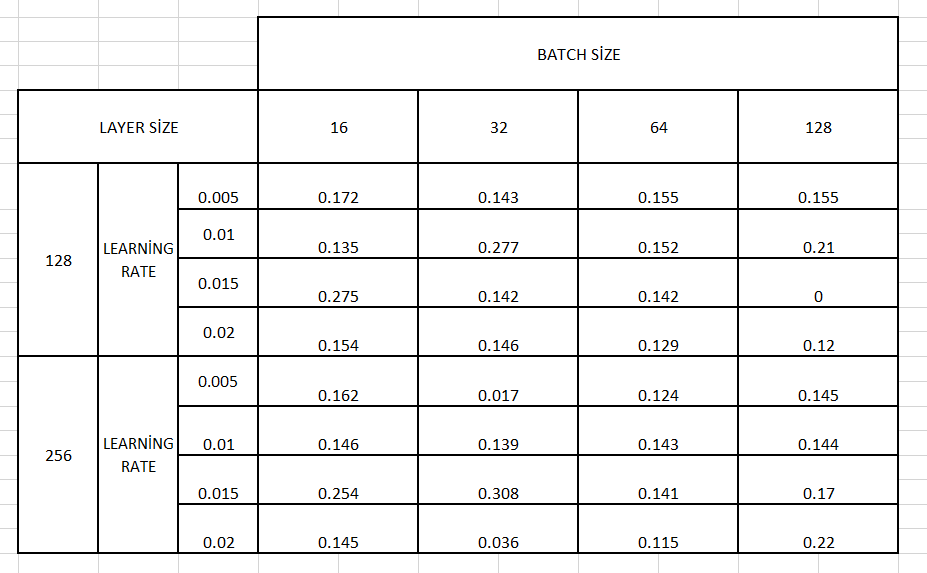

##### I choosed lr=0.0015, batch size = 32 and layer size=256 and I used Sigmoid function. It gives 0.308 accuracy.

### CNN

In [9]:
import os
import numpy as np
import tqdm
import glob
import matplotlib.pyplot as plt
from PIL import Image
import torch.nn.functional as F
import torch
import torch.nn as nn
import torch.optim as optim
from  torch.utils.data import Dataset, DataLoader
from time import time
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [2]:
ROOT_PATH = "flowers"
train_path = f'{ROOT_PATH}/train'
test_path = f'{ROOT_PATH}/test'

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [12]:
mean = [0.554, 0.450, 0.343]
std = [0.231, 0.241, 0.241]
image_size = 64      # 32x32, 64x64, 128x128
batch_size = 128

In [5]:
main_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),  
    transforms.ToTensor(),
    transforms.Normalize(mean,std)      # normalize
])

aug_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomRotation(20),   # rotate images 20 degree randomly
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.1,0.1,0.1),    # about saturation brightness vs.
    transforms.ToTensor(),
    transforms.Normalize(mean,std),
    transforms.RandomErasing()      #randomly erasing pixels 
])

In [6]:
train_dataset = datasets.ImageFolder(train_path, transform=aug_transform)

In [7]:
test_dataset = datasets.ImageFolder(test_path, transform=main_transform)

In [8]:
train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True, num_workers=2)

In [9]:
test_dataloader = DataLoader(test_dataset, batch_size = batch_size, shuffle=False, num_workers=2)

### 1 Conv 1 FC Model

In [10]:
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()

        self.model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)).to(device)

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(16384, 7),
            
        ).to(device)
       
    def forward(self, value):
        value = self.model(value)
        value = self.classifier(value)
        return value

In [18]:
def setDevice():
    # set device
    device=None
    if torch.cuda.is_available():
        device = torch.device("cuda")
    else:
        device = torch.device("cpu")
    print("Using", device)
    return 

In [19]:
def Train(epoch, model, print_every, trainData, criterion, device, optimizer):
    # method for training model
    totalLoss = 0
    start = time()

    accuracy = []

    for i, batch in enumerate(trainData, 1):

        minput = batch[0].to(device)
        target = batch[1].to(device)

        # output of model
        moutput = model(minput)


        # computing the cross entropy loss
        loss = criterion(moutput, target)
        totalLoss += loss.item()

        optimizer.zero_grad()

        # Back propogation
        loss.backward()

        # updating model parameters
        optimizer.step()

        argmax = moutput.argmax(dim=1)
        # calculating accuracy by comparing to target
        accuracy.append((target == argmax).sum().item() / target.shape[0])

        # Returning Average Training Loss and Accuracy
    return totalLoss / len(trainData), sum(accuracy) / len(accuracy)


def Test(epoch, model, epochBased, testData, criterion, device,lr,bs):
    totalLoss = 0
    start = time()

    accuracy = []

    with torch.no_grad():  # disable calculations of gradients for all pytorch operations inside the block
        for i, batch in enumerate(testData):
            minput = batch[0].to(device)
            target = batch[1].to(device)

            # output by our model
            moutput = model(minput)

            # computing the cross entropy loss
            loss = criterion(moutput, target)
            totalLoss += loss.item()


            argmax = moutput.argmax(dim=1)
            # Find the accuracy of the batch by comparing it with actual targets
            accuracy.append((target == argmax).sum().item() / target.shape[0])

    if epochBased:
        print("Epoch:",epoch, "Test Loss:",totalLoss / len(testData) , "Accuracy:" ,sum(accuracy) / len(accuracy), "Time:",time() - start,"Learning Rate:" ,lr,"Batch Size:",bs)
    # Returning Average Testing Loss and Accuracy
    return totalLoss / len(testData), sum(accuracy) / len(accuracy)


def epochLoop(epochNumber, model, trainData, testData, criterion, device, optimizer, batchSize, learningRate):
    # main loop
    trainLosses = []
    testLosses = []
    trainAccuracies = []
    testAccuracies = []

    for epoch in range(1, epochNumber + 1):
        trainLoss, trainAccuracy = Train(epoch, model, 10, trainData, criterion, device, optimizer)
        testLoss, testAccuracy = Test(epoch, model, True, testData, criterion, device,learningRate,batchSize)

        trainLosses.append(trainLoss)
        testLosses.append(testLoss)
        trainAccuracies.append(trainAccuracy)
        testAccuracies.append(testAccuracy)

        if epoch % 30 == 0:
            # SAVING MODEL TO USE IT LATER
            torch.save(model, f"./model_epoch-30_lr-{learningRate}_batch-{batchSize}_dropout-0.45.pth")
    return trainLosses, testLosses, trainAccuracies, testAccuracies


def testingModel(epoch, model, testData, criterion, device):
    loss, accuracy = Test(epoch, model, False, testData, criterion, device)
    return loss, accuracy


def plotting(train, test, text, batch, lr, status):
    plt.plot(range(1, len(train)+1), train, 'r', label="Train {}".format(text))
    plt.plot(range(1, len(test)+1), test, 'b', label="Test {}".format(text))

    plt.title(f"{batch} Batch and {lr} Learning Rate {status}")
    plt.xlabel('Epoch')
    plt.ylabel(text)
    plt.legend()
    plt.show()


In [20]:
def initModel(newNetwork, device, path, learningRate,MyNet):
    # initializing model
    model = None
    if newNetwork:
        model =MyNet().to(device)
    else:
        model = torch.load(path, map_location=device)

    # loss and optimization function
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learningRate)

    return model, criterion, optimizer


In [21]:
# hyper parameters
batchSize = 2
learningRate = 0.005
epochNumber = 10

In [22]:
device = setDevice()

Using cuda


In [19]:
for i in range(4):
    for j in range(4,8):
        model, criterion, optimizer = initModel(True, device, "", learningRate,MyNet)
    
        # main training loop for model
        trainLosses, testLosses, trainAccuracies, testAccuracies = epochLoop(epochNumber, model, train_dataloader, test_dataloader, criterion, device, optimizer, batchSize**j, (learningRate+(learningRate*i)))

Epoch: 1 Test Loss: 1.2088734101165424 Accuracy: 0.5734374999999999 Time: 7.484784126281738 Learning Rate: 0.005 Batch Size: 16
Epoch: 2 Test Loss: 1.0902322043072095 Accuracy: 0.6148200757575757 Time: 7.205335378646851 Learning Rate: 0.005 Batch Size: 16
Epoch: 3 Test Loss: 0.974393831057982 Accuracy: 0.673532196969697 Time: 7.175819635391235 Learning Rate: 0.005 Batch Size: 16
Epoch: 4 Test Loss: 0.9640929915688254 Accuracy: 0.6607954545454545 Time: 7.128385305404663 Learning Rate: 0.005 Batch Size: 16
Epoch: 5 Test Loss: 0.9348657727241516 Accuracy: 0.681155303030303 Time: 7.049607276916504 Learning Rate: 0.005 Batch Size: 16
Epoch: 6 Test Loss: 1.0249887745488773 Accuracy: 0.6613162878787878 Time: 7.343648910522461 Learning Rate: 0.005 Batch Size: 16
Epoch: 7 Test Loss: 0.908639132976532 Accuracy: 0.6974905303030302 Time: 7.234759330749512 Learning Rate: 0.005 Batch Size: 16
Epoch: 8 Test Loss: 0.9304031296209856 Accuracy: 0.6808238636363636 Time: 7.079657316207886 Learning Rate: 0

Epoch: 6 Test Loss: 1.0258371884172612 Accuracy: 0.6545454545454545 Time: 5.392806768417358 Learning Rate: 0.01 Batch Size: 64
Epoch: 7 Test Loss: 0.9579488093202765 Accuracy: 0.6899147727272728 Time: 5.689409255981445 Learning Rate: 0.01 Batch Size: 64
Epoch: 8 Test Loss: 0.9989591620185159 Accuracy: 0.6727746212121212 Time: 6.1725053787231445 Learning Rate: 0.01 Batch Size: 64
Epoch: 9 Test Loss: 1.0604736750776118 Accuracy: 0.6607481060606061 Time: 6.205413579940796 Learning Rate: 0.01 Batch Size: 64
Epoch: 10 Test Loss: 0.9475867585702376 Accuracy: 0.6939867424242424 Time: 5.971820116043091 Learning Rate: 0.01 Batch Size: 64
Epoch: 1 Test Loss: 1.2556113492358814 Accuracy: 0.5624526515151514 Time: 7.110090255737305 Learning Rate: 0.01 Batch Size: 128
Epoch: 2 Test Loss: 1.0881975238973445 Accuracy: 0.627935606060606 Time: 7.1277406215667725 Learning Rate: 0.01 Batch Size: 128
Epoch: 3 Test Loss: 1.1435530212792484 Accuracy: 0.6147727272727272 Time: 5.939721584320068 Learning Rate: 

Epoch: 1 Test Loss: 1.2426769083196467 Accuracy: 0.5676609848484848 Time: 5.5325329303741455 Learning Rate: 0.02 Batch Size: 32
Epoch: 2 Test Loss: 1.092449502511458 Accuracy: 0.6042140151515152 Time: 5.111649513244629 Learning Rate: 0.02 Batch Size: 32
Epoch: 3 Test Loss: 1.065084078095176 Accuracy: 0.6476799242424242 Time: 6.737685203552246 Learning Rate: 0.02 Batch Size: 32
Epoch: 4 Test Loss: 0.9758661551909014 Accuracy: 0.6669507575757575 Time: 5.095729827880859 Learning Rate: 0.02 Batch Size: 32
Epoch: 5 Test Loss: 0.9279593987898394 Accuracy: 0.7022253787878788 Time: 5.099869728088379 Learning Rate: 0.02 Batch Size: 32
Epoch: 6 Test Loss: 0.9349621994928881 Accuracy: 0.6848484848484848 Time: 5.032429933547974 Learning Rate: 0.02 Batch Size: 32
Epoch: 7 Test Loss: 0.9298388768326152 Accuracy: 0.6933712121212121 Time: 5.940145492553711 Learning Rate: 0.02 Batch Size: 32
Epoch: 8 Test Loss: 0.9999882091175426 Accuracy: 0.6497632575757576 Time: 7.033325433731079 Learning Rate: 0.02 

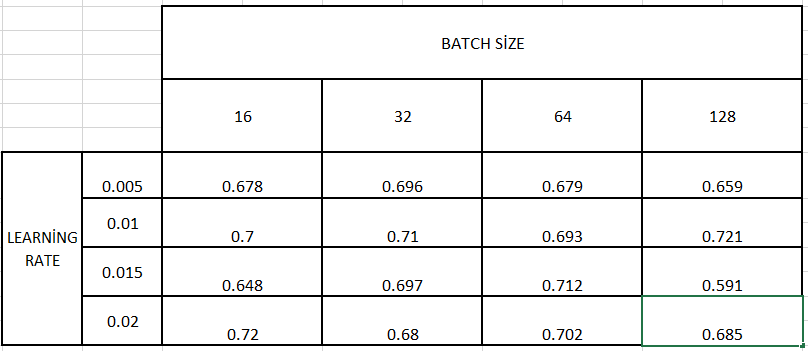

##### I choosed lr=0.01, batch size=128 and I will try different activation functions to see the differences. (ReLU gived 0.721)

In [16]:
#This class uses Sigmoid as activation function.
class MyNet4(nn.Module):
    def __init__(self):
        super(MyNet4, self).__init__()

        self.model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Sigmoid(),
            nn.MaxPool2d(2, 2)).to(device)

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(16384, 7),
            
        ).to(device)
       
    def forward(self, value):
        value = self.model(value)
        value = self.classifier(value)
        return value


In [17]:
model, criterion, optimizer = initModel(True, device, "", learningRate,MyNet4)
trainLosses, testLosses, trainAccuracies, testAccuracies = epochLoop(epochNumber, model, train_dataloader, test_dataloader, criterion, device, optimizer, 128, 0.01)

Epoch: 1 Test Loss: 1.8827711885625666 Accuracy: 0.4502840909090909 Time: 8.528215408325195 Learning Rate: 0.01 Batch Size: 128
Epoch: 2 Test Loss: 3.9675745368003845 Accuracy: 0.3302556818181818 Time: 7.670785665512085 Learning Rate: 0.01 Batch Size: 128
Epoch: 3 Test Loss: 2.26636603474617 Accuracy: 0.4375 Time: 7.773770809173584 Learning Rate: 0.01 Batch Size: 128
Epoch: 4 Test Loss: 2.2075490788979963 Accuracy: 0.4269412878787879 Time: 8.386277198791504 Learning Rate: 0.01 Batch Size: 128
Epoch: 5 Test Loss: 1.8323449492454529 Accuracy: 0.45288825757575757 Time: 7.81364893913269 Learning Rate: 0.01 Batch Size: 128
Epoch: 6 Test Loss: 2.082725855437192 Accuracy: 0.4620265151515151 Time: 8.005872011184692 Learning Rate: 0.01 Batch Size: 128
Epoch: 7 Test Loss: 1.8674014562910253 Accuracy: 0.4768465909090909 Time: 7.806575775146484 Learning Rate: 0.01 Batch Size: 128
Epoch: 8 Test Loss: 2.186317660591819 Accuracy: 0.42916666666666664 Time: 7.718475818634033 Learning Rate: 0.01 Batch S

In [18]:
#This class uses tanh as activation function.
class MyNet5(nn.Module):
    def __init__(self):
        super(MyNet5, self).__init__()

        self.model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2, 2)).to(device)

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(16384, 7),
            
        ).to(device)
       
    def forward(self, value):
        value = self.model(value)
        value = self.classifier(value)
        return value


In [19]:
model, criterion, optimizer = initModel(True, device, "", learningRate,MyNet5)
trainLosses, testLosses, trainAccuracies, testAccuracies = epochLoop(epochNumber, model, train_dataloader, test_dataloader, criterion, device, optimizer, 128, 0.01)

Epoch: 1 Test Loss: 1.3905332305214622 Accuracy: 0.4964015151515151 Time: 8.28998851776123 Learning Rate: 0.01 Batch Size: 128
Epoch: 2 Test Loss: 1.3962807330218228 Accuracy: 0.5314867424242424 Time: 8.40925908088684 Learning Rate: 0.01 Batch Size: 128
Epoch: 3 Test Loss: 1.2816308357498862 Accuracy: 0.5422348484848485 Time: 8.17359185218811 Learning Rate: 0.01 Batch Size: 128
Epoch: 4 Test Loss: 1.210306384346702 Accuracy: 0.5906250000000001 Time: 8.413010358810425 Learning Rate: 0.01 Batch Size: 128
Epoch: 5 Test Loss: 1.2917271744121204 Accuracy: 0.5522253787878788 Time: 8.134125471115112 Learning Rate: 0.01 Batch Size: 128
Epoch: 6 Test Loss: 1.2282974882559343 Accuracy: 0.5819602272727272 Time: 7.826078414916992 Learning Rate: 0.01 Batch Size: 128
Epoch: 7 Test Loss: 1.227710648016496 Accuracy: 0.5743371212121212 Time: 7.987324953079224 Learning Rate: 0.01 Batch Size: 128
Epoch: 8 Test Loss: 1.2724824222651394 Accuracy: 0.5670928030303031 Time: 7.713644027709961 Learning Rate: 0.

As you see, I tried Tanh, ReLU and Sigmoid functions. ReLU performed best.

### 2 Conv 2 FC Model

In [26]:
class MyNet2(nn.Module):
    def __init__(self):
        super(MyNet2, self).__init__()

        self.model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)).to(device)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(8192, 256),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(256, 7) ).to(device)
       
    def forward(self, value):
        value = self.model(value)
        value = self.classifier(value)
        return value

In [27]:
for i in range(4):
    for j in range(4,8):
        model, criterion, optimizer = initModel(True, device, "", learningRate,MyNet2)
    
        # main training loop for model
        trainLosses, testLosses, trainAccuracies, testAccuracies = epochLoop(epochNumber, model, train_dataloader, test_dataloader, criterion, device, optimizer, batchSize**j, (learningRate+(learningRate*i)))

Epoch: 1 Test Loss: 1.380451343276284 Accuracy: 0.5026041666666666 Time: 5.268660306930542 Learning Rate: 0.005 Batch Size: 16
Epoch: 2 Test Loss: 1.237963784824718 Accuracy: 0.5425189393939394 Time: 6.880353927612305 Learning Rate: 0.005 Batch Size: 16
Epoch: 3 Test Loss: 1.1117120005867698 Accuracy: 0.5945075757575757 Time: 7.252880334854126 Learning Rate: 0.005 Batch Size: 16
Epoch: 4 Test Loss: 1.0688981413841248 Accuracy: 0.5970643939393939 Time: 7.2210962772369385 Learning Rate: 0.005 Batch Size: 16
Epoch: 5 Test Loss: 1.0416012785651467 Accuracy: 0.6365530303030303 Time: 7.204683303833008 Learning Rate: 0.005 Batch Size: 16
Epoch: 6 Test Loss: 0.9995967691594904 Accuracy: 0.6331439393939394 Time: 7.3185670375823975 Learning Rate: 0.005 Batch Size: 16
Epoch: 7 Test Loss: 0.9628501534461975 Accuracy: 0.6697443181818182 Time: 7.158331871032715 Learning Rate: 0.005 Batch Size: 16
Epoch: 8 Test Loss: 0.8916291215203025 Accuracy: 0.6812026515151515 Time: 7.220202445983887 Learning Rat

Epoch: 6 Test Loss: 0.9956602670929648 Accuracy: 0.6319128787878788 Time: 7.205986976623535 Learning Rate: 0.01 Batch Size: 64
Epoch: 7 Test Loss: 0.9425581720742312 Accuracy: 0.6619791666666667 Time: 7.268582344055176 Learning Rate: 0.01 Batch Size: 64
Epoch: 8 Test Loss: 0.9066570590842854 Accuracy: 0.6793087121212121 Time: 7.3614537715911865 Learning Rate: 0.01 Batch Size: 64
Epoch: 9 Test Loss: 0.8813381547277624 Accuracy: 0.6928977272727272 Time: 7.221592426300049 Learning Rate: 0.01 Batch Size: 64
Epoch: 10 Test Loss: 0.9137928187847137 Accuracy: 0.6639204545454546 Time: 7.190922737121582 Learning Rate: 0.01 Batch Size: 64
Epoch: 1 Test Loss: 1.6597894755276767 Accuracy: 0.3553977272727273 Time: 5.876361131668091 Learning Rate: 0.01 Batch Size: 128
Epoch: 2 Test Loss: 1.5101553906093945 Accuracy: 0.4164772727272727 Time: 7.142230987548828 Learning Rate: 0.01 Batch Size: 128
Epoch: 3 Test Loss: 1.4386307326230137 Accuracy: 0.4524147727272727 Time: 7.26754093170166 Learning Rate: 0

Epoch: 1 Test Loss: 1.481849112293937 Accuracy: 0.4491950757575758 Time: 7.33728551864624 Learning Rate: 0.02 Batch Size: 32
Epoch: 2 Test Loss: 1.0830791375853799 Accuracy: 0.6034090909090909 Time: 7.176559925079346 Learning Rate: 0.02 Batch Size: 32
Epoch: 3 Test Loss: 0.9895040013573386 Accuracy: 0.649715909090909 Time: 7.253773927688599 Learning Rate: 0.02 Batch Size: 32
Epoch: 4 Test Loss: 1.001404724337838 Accuracy: 0.6510890151515152 Time: 7.3857903480529785 Learning Rate: 0.02 Batch Size: 32
Epoch: 5 Test Loss: 0.95695115219463 Accuracy: 0.6595170454545455 Time: 7.158321857452393 Learning Rate: 0.02 Batch Size: 32
Epoch: 6 Test Loss: 1.0158710859038613 Accuracy: 0.670123106060606 Time: 7.204685926437378 Learning Rate: 0.02 Batch Size: 32
Epoch: 7 Test Loss: 0.8956923864104531 Accuracy: 0.686316287878788 Time: 7.298948526382446 Learning Rate: 0.02 Batch Size: 32
Epoch: 8 Test Loss: 0.9056795320727609 Accuracy: 0.6900094696969696 Time: 7.221760511398315 Learning Rate: 0.02 Batch 

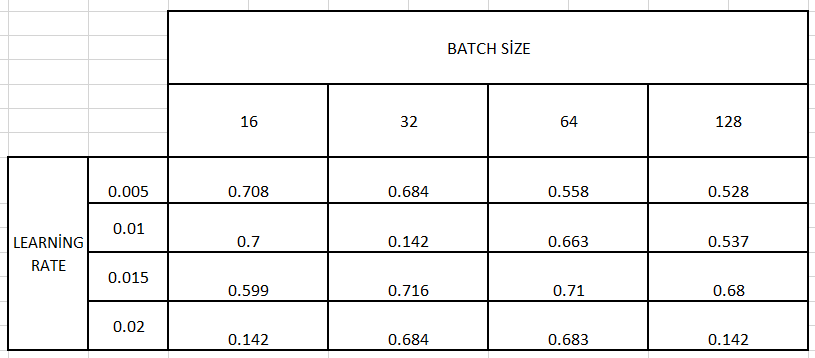

##### I choosed lr=0.015, batch size=32. It gives 0.716 accuracy in 2 CONV 2 FC model.

### 5 Conv  2 FC models with dropout

In [28]:
class MyNet3(nn.Module):
    def __init__(self):
        super(MyNet3, self).__init__()
    
        self.model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        ).to(device)

        # nn.Dropout(0.25),
        # nn.Dropout(0.5),
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1024, 256),
            nn.ReLU(),
            nn.Linear(256, 7)
        ).to(device)

    def forward(self, value):
        value = self.model(value)
        value = self.classifier(value)
        return value

In [29]:
for i in range(4):
    for j in range(4,8):
        model, criterion, optimizer = initModel(True, device, "", learningRate,MyNet3)

        trainLosses, testLosses, trainAccuracies, testAccuracies = epochLoop(epochNumber, model, train_dataloader, test_dataloader, criterion, device, optimizer, batchSize**j, (learningRate+(learningRate*i)))

Epoch: 1 Test Loss: 1.4805740822445264 Accuracy: 0.35298295454545453 Time: 7.265925407409668 Learning Rate: 0.005 Batch Size: 16
Epoch: 2 Test Loss: 1.1909759640693665 Accuracy: 0.5475378787878787 Time: 7.407564878463745 Learning Rate: 0.005 Batch Size: 16
Epoch: 3 Test Loss: 0.9931312284686349 Accuracy: 0.6461647727272727 Time: 7.277137994766235 Learning Rate: 0.005 Batch Size: 16
Epoch: 4 Test Loss: 0.9071547063914213 Accuracy: 0.673153409090909 Time: 7.297315835952759 Learning Rate: 0.005 Batch Size: 16
Epoch: 5 Test Loss: 0.8981877782128074 Accuracy: 0.671780303030303 Time: 7.478131055831909 Learning Rate: 0.005 Batch Size: 16
Epoch: 6 Test Loss: 0.8660214164040305 Accuracy: 0.7127840909090909 Time: 7.283008098602295 Learning Rate: 0.005 Batch Size: 16
Epoch: 7 Test Loss: 0.8379092487421903 Accuracy: 0.6996212121212121 Time: 7.407532691955566 Learning Rate: 0.005 Batch Size: 16
Epoch: 8 Test Loss: 0.8113914836536754 Accuracy: 0.7189867424242424 Time: 7.4396233558654785 Learning Rat

Epoch: 6 Test Loss: 0.8732820369980552 Accuracy: 0.6960227272727273 Time: 7.438725709915161 Learning Rate: 0.01 Batch Size: 64
Epoch: 7 Test Loss: 0.8086224279620431 Accuracy: 0.734280303030303 Time: 7.346008539199829 Learning Rate: 0.01 Batch Size: 64
Epoch: 8 Test Loss: 0.8215495944023132 Accuracy: 0.7333333333333333 Time: 7.346518278121948 Learning Rate: 0.01 Batch Size: 64
Epoch: 9 Test Loss: 0.8105071837251837 Accuracy: 0.7214488636363636 Time: 7.488923788070679 Learning Rate: 0.01 Batch Size: 64
Epoch: 10 Test Loss: 0.8094636635346846 Accuracy: 0.7223958333333333 Time: 7.497724533081055 Learning Rate: 0.01 Batch Size: 64
Epoch: 1 Test Loss: 1.593476490540938 Accuracy: 0.3196022727272727 Time: 7.426006078720093 Learning Rate: 0.01 Batch Size: 128
Epoch: 2 Test Loss: 1.1128534972667694 Accuracy: 0.5804924242424243 Time: 7.330874681472778 Learning Rate: 0.01 Batch Size: 128
Epoch: 3 Test Loss: 0.9928861152042042 Accuracy: 0.6540719696969698 Time: 7.282596111297607 Learning Rate: 0.0

Epoch: 1 Test Loss: 1.5970102115110918 Accuracy: 0.29924242424242425 Time: 7.407034397125244 Learning Rate: 0.02 Batch Size: 32
Epoch: 2 Test Loss: 1.481320858001709 Accuracy: 0.4018939393939394 Time: 7.439768075942993 Learning Rate: 0.02 Batch Size: 32
Epoch: 3 Test Loss: 1.3319905617020347 Accuracy: 0.4897727272727273 Time: 7.3288350105285645 Learning Rate: 0.02 Batch Size: 32
Epoch: 4 Test Loss: 1.1670367690649899 Accuracy: 0.5423295454545455 Time: 7.34509539604187 Learning Rate: 0.02 Batch Size: 32
Epoch: 5 Test Loss: 1.0339059829711914 Accuracy: 0.6274621212121212 Time: 7.44033408164978 Learning Rate: 0.02 Batch Size: 32
Epoch: 6 Test Loss: 1.0111790841275996 Accuracy: 0.6424242424242425 Time: 7.468284845352173 Learning Rate: 0.02 Batch Size: 32
Epoch: 7 Test Loss: 0.8972929553552107 Accuracy: 0.680871212121212 Time: 7.3613340854644775 Learning Rate: 0.02 Batch Size: 32
Epoch: 8 Test Loss: 0.8535883020270955 Accuracy: 0.6828124999999999 Time: 7.3465940952301025 Learning Rate: 0.02

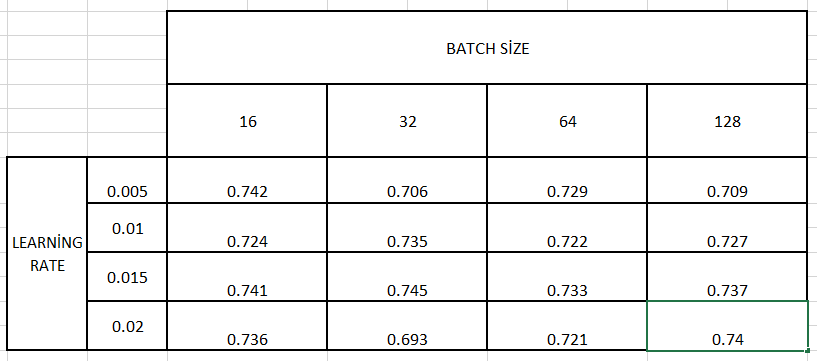

##### I choosed lr=0.015, batch size=32. It gives 0.745 accuracy in 5 CONV 2 FC model.

### From now on, I will change the image sizes as 32 and recalculate

In [30]:
mean = [0.554, 0.450, 0.343]
std = [0.231, 0.241, 0.241]
image_size = 32      # 32x32, 64x64, 128x128
batch_size = 128

In [31]:
main_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),  
    transforms.ToTensor(),
    transforms.Normalize(mean,std)      # normalize
])

aug_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomRotation(20),   # rotate images 20 degree randomly
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.1,0.1,0.1),    # about saturation brightness vs.
    transforms.ToTensor(),
    transforms.Normalize(mean,std),
    transforms.RandomErasing()      #randomly erasing pixels 
])

In [32]:
train_dataset = datasets.ImageFolder(train_path, transform=aug_transform)

In [33]:
test_dataset = datasets.ImageFolder(test_path, transform=main_transform)

In [34]:
train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True, num_workers=2)

In [35]:
test_dataloader = DataLoader(test_dataset, batch_size = batch_size, shuffle=False, num_workers=2)

In [36]:
class MyNet6(nn.Module):
    def __init__(self):
        super(MyNet6, self).__init__()

        self.model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)).to(device)

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(4096, 7),
            
        ).to(device)
       
    def forward(self, value):
        value = self.model(value)
        value = self.classifier(value)
        return value

        return out

In [37]:
for i in range(4):
    for j in range(4,8):
        model, criterion, optimizer = initModel(True, device, "", learningRate,MyNet6)
      
        trainLosses, testLosses, trainAccuracies, testAccuracies = epochLoop(epochNumber, model, train_dataloader, test_dataloader, criterion, device, optimizer, batchSize**j, (learningRate+(learningRate*i)))

Epoch: 1 Test Loss: 1.1427372314713218 Accuracy: 0.6053503787878788 Time: 5.5478222370147705 Learning Rate: 0.005 Batch Size: 16
Epoch: 2 Test Loss: 1.0743857730518689 Accuracy: 0.6100852272727273 Time: 5.18847918510437 Learning Rate: 0.005 Batch Size: 16
Epoch: 3 Test Loss: 1.0979479984803633 Accuracy: 0.6204545454545455 Time: 4.814531087875366 Learning Rate: 0.005 Batch Size: 16
Epoch: 4 Test Loss: 1.0255825031887402 Accuracy: 0.6536458333333334 Time: 6.753464221954346 Learning Rate: 0.005 Batch Size: 16
Epoch: 5 Test Loss: 0.9560301737351851 Accuracy: 0.6741477272727273 Time: 6.782198905944824 Learning Rate: 0.005 Batch Size: 16
Epoch: 6 Test Loss: 0.9502879326993768 Accuracy: 0.6911931818181819 Time: 5.15771746635437 Learning Rate: 0.005 Batch Size: 16
Epoch: 7 Test Loss: 0.9237853478301655 Accuracy: 0.7020833333333333 Time: 4.921559810638428 Learning Rate: 0.005 Batch Size: 16
Epoch: 8 Test Loss: 0.9115718738599257 Accuracy: 0.7089488636363637 Time: 6.127466201782227 Learning Rate

Epoch: 6 Test Loss: 1.0237405083396218 Accuracy: 0.6570075757575758 Time: 5.565120697021484 Learning Rate: 0.01 Batch Size: 64
Epoch: 7 Test Loss: 1.0309109064665707 Accuracy: 0.6632102272727273 Time: 6.847556829452515 Learning Rate: 0.01 Batch Size: 64
Epoch: 8 Test Loss: 0.9569657011465593 Accuracy: 0.6833806818181819 Time: 6.781850576400757 Learning Rate: 0.01 Batch Size: 64
Epoch: 9 Test Loss: 0.971803445707668 Accuracy: 0.6850378787878788 Time: 4.939709663391113 Learning Rate: 0.01 Batch Size: 64
Epoch: 10 Test Loss: 0.9459751194173639 Accuracy: 0.6773674242424242 Time: 5.049489259719849 Learning Rate: 0.01 Batch Size: 64
Epoch: 1 Test Loss: 1.1825573390180415 Accuracy: 0.5587121212121212 Time: 6.924175977706909 Learning Rate: 0.01 Batch Size: 128
Epoch: 2 Test Loss: 1.196274004199288 Accuracy: 0.5797348484848485 Time: 6.814251899719238 Learning Rate: 0.01 Batch Size: 128
Epoch: 3 Test Loss: 1.0864790136163884 Accuracy: 0.6082386363636364 Time: 4.8688061237335205 Learning Rate: 0.

Epoch: 1 Test Loss: 1.135359758680517 Accuracy: 0.6016098484848486 Time: 4.816510200500488 Learning Rate: 0.02 Batch Size: 32
Epoch: 2 Test Loss: 1.0963124470277266 Accuracy: 0.625 Time: 5.923582315444946 Learning Rate: 0.02 Batch Size: 32
Epoch: 3 Test Loss: 0.9999021562662992 Accuracy: 0.6565340909090909 Time: 6.850703477859497 Learning Rate: 0.02 Batch Size: 32
Epoch: 4 Test Loss: 0.9605734077366915 Accuracy: 0.6752367424242425 Time: 6.753399610519409 Learning Rate: 0.02 Batch Size: 32
Epoch: 5 Test Loss: 0.9515355066819624 Accuracy: 0.686221590909091 Time: 4.828902244567871 Learning Rate: 0.02 Batch Size: 32
Epoch: 6 Test Loss: 0.9564092592759565 Accuracy: 0.6815814393939393 Time: 5.610435485839844 Learning Rate: 0.02 Batch Size: 32
Epoch: 7 Test Loss: 0.939300309528004 Accuracy: 0.6867897727272727 Time: 6.673196315765381 Learning Rate: 0.02 Batch Size: 32
Epoch: 8 Test Loss: 0.930844550782984 Accuracy: 0.6808238636363636 Time: 6.657939195632935 Learning Rate: 0.02 Batch Size: 32
E

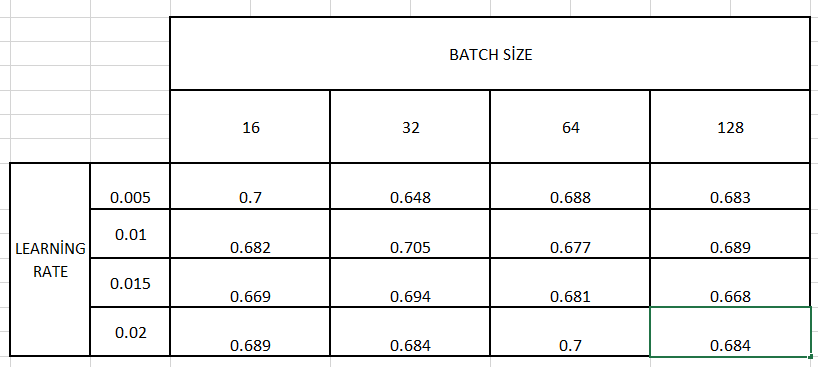

##### I choosed lr=0.01, batch size=32. It gives 0.705 accuracy in 1CONV 1 FC model.

In [38]:
class MyNet7(nn.Module):
    def __init__(self):
        super(MyNet7, self).__init__()

        self.model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)).to(device)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(2048, 128),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(128, 7) ).to(device)
       
    def forward(self, value):
        value = self.model(value)
        value = self.classifier(value)
        return value
        return out

In [39]:
for i in range(4):
    for j in range(4,8):
        model, criterion, optimizer = initModel(True, device, "", learningRate,MyNet7)
    
        # main training loop for model
        trainLosses, testLosses, trainAccuracies, testAccuracies = epochLoop(epochNumber, model, train_dataloader, test_dataloader, criterion, device, optimizer, batchSize**j, (learningRate+(learningRate*i)))

Epoch: 1 Test Loss: 1.239957338029688 Accuracy: 0.5356534090909091 Time: 4.812764644622803 Learning Rate: 0.005 Batch Size: 16
Epoch: 2 Test Loss: 1.1326031630689448 Accuracy: 0.5856060606060606 Time: 5.2041637897491455 Learning Rate: 0.005 Batch Size: 16
Epoch: 3 Test Loss: 0.9896831891753457 Accuracy: 0.6425189393939393 Time: 6.923241853713989 Learning Rate: 0.005 Batch Size: 16
Epoch: 4 Test Loss: 0.9287399730899117 Accuracy: 0.6765625000000001 Time: 6.868009805679321 Learning Rate: 0.005 Batch Size: 16
Epoch: 5 Test Loss: 0.8779921206561002 Accuracy: 0.7094223484848485 Time: 6.003143310546875 Learning Rate: 0.005 Batch Size: 16
Epoch: 6 Test Loss: 0.8640748235312375 Accuracy: 0.701467803030303 Time: 5.31374454498291 Learning Rate: 0.005 Batch Size: 16
Epoch: 7 Test Loss: 0.8608599521897056 Accuracy: 0.7084753787878788 Time: 4.829437255859375 Learning Rate: 0.005 Batch Size: 16
Epoch: 8 Test Loss: 0.8331351334398444 Accuracy: 0.7005681818181818 Time: 6.252485990524292 Learning Rate:

Epoch: 6 Test Loss: 0.9280918674035505 Accuracy: 0.6791193181818183 Time: 5.210997581481934 Learning Rate: 0.01 Batch Size: 64
Epoch: 7 Test Loss: 0.898053302006288 Accuracy: 0.6750473484848485 Time: 4.907936334609985 Learning Rate: 0.01 Batch Size: 64
Epoch: 8 Test Loss: 0.8974095257845792 Accuracy: 0.6796401515151516 Time: 6.783086061477661 Learning Rate: 0.01 Batch Size: 64
Epoch: 9 Test Loss: 0.8531815897334706 Accuracy: 0.7052083333333333 Time: 6.8006768226623535 Learning Rate: 0.01 Batch Size: 64
Epoch: 10 Test Loss: 0.8270265107805078 Accuracy: 0.7143465909090909 Time: 6.877303123474121 Learning Rate: 0.01 Batch Size: 64
Epoch: 1 Test Loss: 1.1310130899602717 Accuracy: 0.600094696969697 Time: 5.18829870223999 Learning Rate: 0.01 Batch Size: 128
Epoch: 2 Test Loss: 0.9843537319790233 Accuracy: 0.6443655303030303 Time: 5.299611568450928 Learning Rate: 0.01 Batch Size: 128
Epoch: 3 Test Loss: 0.9173311645334418 Accuracy: 0.676657196969697 Time: 4.8297343254089355 Learning Rate: 0.0

Epoch: 1 Test Loss: 1.1002192443067378 Accuracy: 0.5910984848484848 Time: 5.328543186187744 Learning Rate: 0.02 Batch Size: 32
Epoch: 2 Test Loss: 1.0102324458685787 Accuracy: 0.6384469696969698 Time: 6.812988758087158 Learning Rate: 0.02 Batch Size: 32
Epoch: 3 Test Loss: 0.8974717096848921 Accuracy: 0.682717803030303 Time: 6.844066143035889 Learning Rate: 0.02 Batch Size: 32
Epoch: 4 Test Loss: 0.8839588815515692 Accuracy: 0.6937973484848485 Time: 6.455289363861084 Learning Rate: 0.02 Batch Size: 32
Epoch: 5 Test Loss: 0.8213734437118877 Accuracy: 0.713873106060606 Time: 4.909032344818115 Learning Rate: 0.02 Batch Size: 32
Epoch: 6 Test Loss: 0.816262117841027 Accuracy: 0.7287405303030302 Time: 6.7730114459991455 Learning Rate: 0.02 Batch Size: 32
Epoch: 7 Test Loss: 0.8090756291692908 Accuracy: 0.7289772727272728 Time: 6.829627275466919 Learning Rate: 0.02 Batch Size: 32
Epoch: 8 Test Loss: 0.8022653975270011 Accuracy: 0.7399147727272727 Time: 6.896316766738892 Learning Rate: 0.02 B

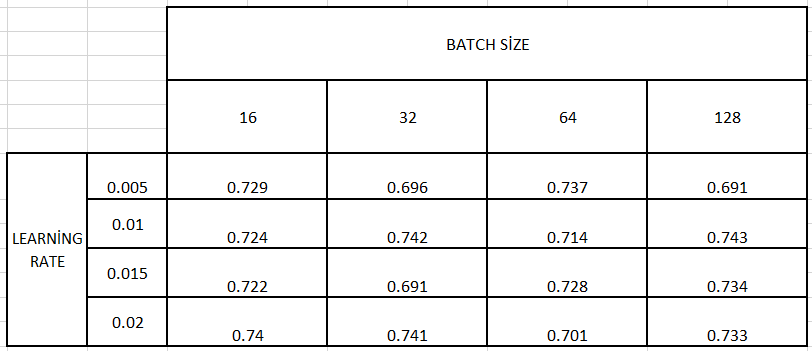

##### I choosed lr=0.01, batch size=128. It gives 0.743 accuracy in 2CONV 2FC model.

In [40]:
class MyNet8(nn.Module):
    def __init__(self):
        super(MyNet8, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        ).to(device)

        # nn.Dropout(0.25),
        # nn.Dropout(0.5),
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 7)
        ).to(device)

    def forward(self, value):
        value = self.model(value)
        value = self.classifier(value)
        return value

In [41]:
for i in range(4):
    for j in range(4,8):
        model, criterion, optimizer = initModel(True, device, "", learningRate,MyNet8)
    
        # main training loop for model
        trainLosses, testLosses, trainAccuracies, testAccuracies = epochLoop(epochNumber, model, train_dataloader, test_dataloader, criterion, device, optimizer, batchSize**j, (learningRate+(learningRate*i)))

Epoch: 1 Test Loss: 1.5584378838539124 Accuracy: 0.3819602272727272 Time: 6.313730001449585 Learning Rate: 0.005 Batch Size: 16
Epoch: 2 Test Loss: 1.2840059399604797 Accuracy: 0.4824810606060606 Time: 6.829691410064697 Learning Rate: 0.005 Batch Size: 16
Epoch: 3 Test Loss: 1.1354827176440845 Accuracy: 0.5596117424242425 Time: 7.009033679962158 Learning Rate: 0.005 Batch Size: 16
Epoch: 4 Test Loss: 1.0607886151833967 Accuracy: 0.6116003787878788 Time: 4.823484659194946 Learning Rate: 0.005 Batch Size: 16
Epoch: 5 Test Loss: 1.0381353741342372 Accuracy: 0.6334280303030303 Time: 4.765843629837036 Learning Rate: 0.005 Batch Size: 16
Epoch: 6 Test Loss: 0.9772507575425234 Accuracy: 0.6529829545454545 Time: 5.9554972648620605 Learning Rate: 0.005 Batch Size: 16
Epoch: 7 Test Loss: 0.9237254641272805 Accuracy: 0.673342803030303 Time: 6.992450475692749 Learning Rate: 0.005 Batch Size: 16
Epoch: 8 Test Loss: 0.8889250213449652 Accuracy: 0.6849905303030304 Time: 6.846885681152344 Learning Rat

Epoch: 6 Test Loss: 0.9335240586237474 Accuracy: 0.6800189393939394 Time: 5.876572370529175 Learning Rate: 0.01 Batch Size: 64
Epoch: 7 Test Loss: 0.8757542832331224 Accuracy: 0.6943181818181818 Time: 6.861812353134155 Learning Rate: 0.01 Batch Size: 64
Epoch: 8 Test Loss: 0.8481251163916155 Accuracy: 0.7073390151515151 Time: 6.818201780319214 Learning Rate: 0.01 Batch Size: 64
Epoch: 9 Test Loss: 0.8512922701510516 Accuracy: 0.7142045454545455 Time: 6.081555128097534 Learning Rate: 0.01 Batch Size: 64
Epoch: 10 Test Loss: 0.862345961007205 Accuracy: 0.6843750000000001 Time: 5.73569393157959 Learning Rate: 0.01 Batch Size: 64
Epoch: 1 Test Loss: 1.435158296064897 Accuracy: 0.42604166666666665 Time: 4.938539743423462 Learning Rate: 0.01 Batch Size: 128
Epoch: 2 Test Loss: 1.1707957766272805 Accuracy: 0.546780303030303 Time: 6.814251661300659 Learning Rate: 0.01 Batch Size: 128
Epoch: 3 Test Loss: 1.0655916983431035 Accuracy: 0.5988162878787878 Time: 6.861154556274414 Learning Rate: 0.01

Epoch: 1 Test Loss: 1.24127905477177 Accuracy: 0.5269886363636364 Time: 6.845962762832642 Learning Rate: 0.02 Batch Size: 32
Epoch: 2 Test Loss: 1.0231165967204354 Accuracy: 0.6194128787878788 Time: 6.579298973083496 Learning Rate: 0.02 Batch Size: 32
Epoch: 3 Test Loss: 0.9577676870606162 Accuracy: 0.6608901515151515 Time: 6.893110513687134 Learning Rate: 0.02 Batch Size: 32
Epoch: 4 Test Loss: 0.8830614225430922 Accuracy: 0.680965909090909 Time: 6.391753673553467 Learning Rate: 0.02 Batch Size: 32
Epoch: 5 Test Loss: 0.8931514024734497 Accuracy: 0.6955492424242424 Time: 5.095393896102905 Learning Rate: 0.02 Batch Size: 32
Epoch: 6 Test Loss: 0.8822454755956476 Accuracy: 0.6964015151515152 Time: 4.980624675750732 Learning Rate: 0.02 Batch Size: 32
Epoch: 7 Test Loss: 0.8132004764947024 Accuracy: 0.7162878787878788 Time: 6.8143792152404785 Learning Rate: 0.02 Batch Size: 32
Epoch: 8 Test Loss: 0.7980859062888406 Accuracy: 0.7224431818181819 Time: 6.971529483795166 Learning Rate: 0.02 B

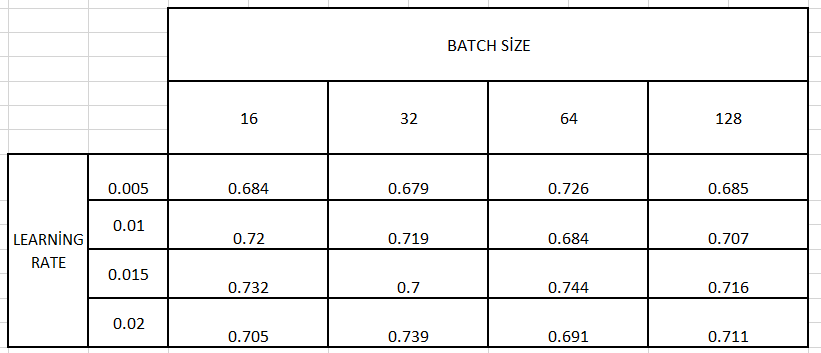

##### I choosed lr=0.015, batch size=64. It gives 0.744 accuracy in 2CONV 2FC model.

### Conclusion
With this assignment, I observed a regular neural network and cnn architecture with different parameters. I used different learning rates (0.005,0.01,0.015,0.02), different batch sizes (16,32,64,128), different hidden layer sizes(128 and 256) and different epoch amounts(50-10). I observed different activation functions (sigmoid, tanh and ReLU) to see the impact. I also observed the different layer types, different layer amounts and operations like dropout. I made tables with the all results of each experiments and I also made a result table consist of the parameters that gives the optimal result of each experiment. I realized that neural networks requires lots of patience while waiting to train. I arranged and slept most of to time while it was training. I even wasted a whole night because of a little crush at the last 5 epoch on training. :) But finally I managed to train and get the results. In first part, I didn't know that I could use PyTorch as well. I suffered about 5-6 days to find the MLNN from scratch code. After I found, it was announced that I could use. I didn't change after that because I made a huge effort for that. I am also very upset about not to make the necessary result graphs and visiualize the neural network architecture because of my old computer. Every attempt I made concluded with dead kernel and all of my trainings wasted. I decided the make result tables instead.
    I am happy about the whole assignment in general and the experiment I made. I hope you will be too.

##### Bonus Part

In [10]:
ROOT_PATH = "chest_xray"
train_path = f'{ROOT_PATH}/train'
test_path = f'{ROOT_PATH}/test'

In [13]:
main_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),  
    transforms.ToTensor(),
    transforms.Normalize(mean,std)      # normalize
])

aug_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomRotation(20),   # rotate images 20 degree randomly
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.1,0.1,0.1),    # about saturation brightness vs.
    transforms.ToTensor(),
    transforms.Normalize(mean,std),
    transforms.RandomErasing()      #randomly erasing pixels 
])

In [14]:
train_dataset = datasets.ImageFolder(train_path, transform=aug_transform)

In [15]:
test_dataset = datasets.ImageFolder(test_path, transform=main_transform)

In [16]:
train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True, num_workers=2)

In [17]:
test_dataloader = DataLoader(test_dataset, batch_size = batch_size, shuffle=False, num_workers=2)

In [23]:
class MyNet9(nn.Module):
    def __init__(self):
        super(MyNet9, self).__init__()

        self.model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)).to(device)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(8192, 256),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(256, 3) ).to(device)
       
    def forward(self, value):
        value = self.model(value)
        value = self.classifier(value)
        return value

In [24]:
model, criterion, optimizer = initModel(True, device, "", learningRate,MyNet9)
trainLosses, testLosses, trainAccuracies, testAccuracies = epochLoop(epochNumber, model, train_dataloader, test_dataloader, criterion, device, optimizer, 32, 0.015)

Epoch: 1 Test Loss: 1.0936876932779949 Accuracy: 0.2604166666666667 Time: 10.255365371704102 Learning Rate: 0.015 Batch Size: 32
Epoch: 2 Test Loss: 1.0963853200276692 Accuracy: 0.4791666666666667 Time: 9.536974668502808 Learning Rate: 0.015 Batch Size: 32
Epoch: 3 Test Loss: 1.098344326019287 Accuracy: 0.2604166666666667 Time: 8.238994121551514 Learning Rate: 0.015 Batch Size: 32
Epoch: 4 Test Loss: 1.0975431601206462 Accuracy: 0.4791666666666667 Time: 9.427500009536743 Learning Rate: 0.015 Batch Size: 32
Epoch: 5 Test Loss: 1.0961777766545613 Accuracy: 0.4791666666666667 Time: 6.648870944976807 Learning Rate: 0.015 Batch Size: 32
Epoch: 6 Test Loss: 1.098451018333435 Accuracy: 0.2604166666666667 Time: 9.619754552841187 Learning Rate: 0.015 Batch Size: 32
Epoch: 7 Test Loss: 1.1002848943074544 Accuracy: 0.2604166666666667 Time: 8.71506142616272 Learning Rate: 0.015 Batch Size: 32
Epoch: 8 Test Loss: 1.098293940226237 Accuracy: 0.4791666666666667 Time: 9.42753791809082 Learning Rate: 0

Here is you see the attempt of trying the chest_xray image in 2Conv-2Fc model. It is costly in time comparing to my knn in first assignment and it has less accuracy comparing to knn. It may be because of the parameters but I just wanted the see the difference of execution time. I also didn't do the filters as I did the first assignment.